In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./sample_data/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [11]:
df.tail()

,Unnamed: 0,text,label
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


**Data Preprocessing**

In [12]:
custom_stopwords = [
    "i","im","like", "feel", "feeling", "my", "the", "to", "still"
                     "for","know","littl","think","time","thing","would","go",
                     "really","feel","am","so","get", "one", "to", "and", "at", "can",
                     "day","way", "make", "me", "want", "could" , "would", "tri", "u"
                     ]

In [18]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
all_stopwords=stopwords.words('english') + custom_stopwords

In [20]:
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
import re
from nltk.stem import PorterStemmer

In [25]:
#  function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace all runs of whitespaces with a single space
    # Optionally, remove stopwords and stem
    words = text.split()
    words = [word for word in words if word not in all_stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [26]:
# Clean your dataset here
df['text'] = df['text'].apply(clean_text)

In [27]:
df.head()

,Unnamed: 0,text,label
0,0,helpless heavi heart,4
1,1,ive enjoy abl slouch relax unwind frankli need...,0
2,2,gave internship dmrg distraught,4
3,3,dont lost,0
4,4,kindergarten teacher thoroughli weari job take...,4


In [28]:
df.tail()

,Unnamed: 0,text,label
416804,416804,tell horni devil find site suit sort interest ...,2
416805,416805,began realiz agit restless thought dish,3
416806,416806,curiou previou earli dawn seek troubl,5
416807,416807,becuas tyran natur govern el salvador savag so...,3
416808,416808,spent investig surround thing start curiou peopl,5


**Reducing Labels to 3**

In [29]:
def reduceLabels(text):
    # print(type(text))
    if text==0 or text==3:
        return 0
    elif text==1 or text==2:
        return 1
    elif text==4 or text==5:
        return 2
    return 2

In [30]:
# Reduce the labels
df['label'] = df['label'].apply(reduceLabels)

In [31]:
df.head()

,Unnamed: 0,text,label
0,0,helpless heavi heart,2
1,1,ive enjoy abl slouch relax unwind frankli need...,0
2,2,gave internship dmrg distraught,2
3,3,dont lost,0
4,4,kindergarten teacher thoroughli weari job take...,2


**XGBoost Model**

In [32]:
from xgboost import XGBClassifier

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [41]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [42]:
# Predictions
y_pred = pipeline.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.922266740241357
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     35642
           1       0.95      0.92      0.93     35093
           2       0.88      0.88      0.88     12627

    accuracy                           0.92     83362
   macro avg       0.91      0.91      0.91     83362
weighted avg       0.92      0.92      0.92     83362



**Confusion Matrix**

In [44]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,make_scorer

In [45]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' based on your needs
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.922266740241357
Precision: 0.9227633092197493
Recall: 0.922266740241357
F1 Score: 0.922322088815294



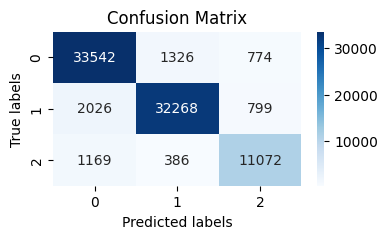

In [47]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print()
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()